In [ ]:
from spacerocks import SpaceRock, Units
from spacerocks.mpchecker import MPChecker

import numpy as np

from astropy.time import Time
from astropy import units as u
from astropy.coordinates import Angle

from astroquery.jplhorizons import Horizons
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [ ]:
#downloading Million objects from mpc would be slow
#spacerocks will convert json files into feather
#Once MPChecker object has been created, everthing should be fast
#we can also load distant object only with catalog='distant_extended'

checker = MPChecker(catalog='mpcorb_extended', update=False)

In [3]:
units = Units()
units.angular_separation = u.arcmin

In [4]:
epoch = 59715.73000000 
ra = 180
dec = 10
radius = 60

In [5]:
rocks_in_field, obs = checker.check(ra, dec, radius, epoch, maglim=27, obscode='566', units=units)

/Users/edlin/opt/anaconda3/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 5 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Output()

In [6]:
print(f'There are {len(rocks_in_field)} asteroids in the field.')

There are 228 asteroids in the field.


In [7]:
rocks_in_field.name

array(['1986 UP', '1999 JH3', '1998 HG71', '1998 EG12', '1999 GQ33',
       '1999 XG213', '2000 EJ111', '2000 CW116', '2000 KS77', '2000 TJ19',
       '2000 YJ133', '2001 HD42', '2000 AC99', '2002 JX7', '2000 HM66',
       '2001 KY4', '1994 WO1', '2000 OS69', '2002 JK120', '2002 LG28',
       '2004 ES2', '2003 UZ169', '2001 TA141', '1999 NB6', '2003 CL12',
       '2003 JM10', '2002 CX113', '2003 YZ10', '2002 CZ114', '2005 AV13',
       '2001 CV25', '2006 WK8', '2004 JJ1', '2001 WZ8', '2000 YT115',
       '2002 PD58', '2002 RU239', '2004 TY108', '2004 BM103',
       '2001 XS215', '2005 AW19', '2007 NZ2', '2003 UU189', '2008 KW',
       '2008 XX47', '1995 XR4', '2003 WL141', '2006 VY68', '2007 TR393',
       '2005 JZ100', '2000 WG45', '2005 UZ108', '2006 TJ111', '2009 JK8',
       '2005 EB79', '2007 BJ65', '2010 JK38', '1999 TR232', '2002 PR189',
       '2007 VX150', '2003 YC22', '2010 LW113', '2003 YJ80', '2008 EW51',
       '2005 UO334', '2009 WT46', '2004 BP77', '2011 GU87', '2003 VC1

Text(0, 0.5, 'DEC (deg)')

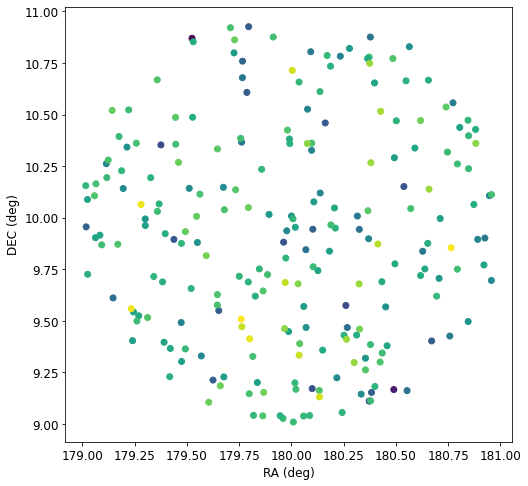

In [8]:
#plot the sky postion
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(obs.ra.deg, obs.dec.deg, c=obs.mag)
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

In [9]:
#compare the ephemeris of mpchecker with JPL Horizons

dates = Time([epoch, epoch+1], scale='utc', format='mjd')
seps = np.zeros(len(rocks_in_field))
seps_ra = np.zeros(len(rocks_in_field))
seps_dec = np.zeros(len(rocks_in_field))
for n, rock_id in enumerate(rocks_in_field.name):
    ephem_Horizons = Horizons(id=rock_id, location='566',
                          epochs={'start':dates[0].iso, 
                                  'stop':dates[1].iso, 
                                  'step':'2d'}).ephemerides()
    pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
    pos_pred = SkyCoord(obs[rocks_in_field.name == rock_id].ra.deg, obs[rocks_in_field.name == rock_id].dec.deg, frame='icrs', unit=(u.deg, u.deg))
    seps[n] += pos_pred.separation(pos_Horizons).arcsec[0]
    seps_ra[n] += (obs[rocks_in_field.name == rock_id].ra - pos_Horizons.ra).arcsec[0]
    seps_dec[n] += (obs[rocks_in_field.name == rock_id].dec - pos_Horizons.dec).arcsec[0]
    

214 of 228 have Residuals < 2"


Text(0, 0.5, 'number')

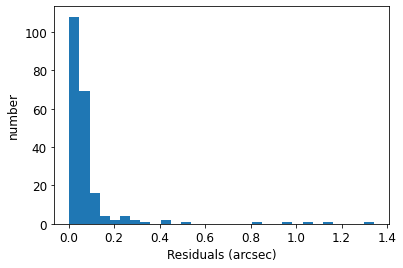

In [10]:
print(f'{(seps<2).sum()} of {len(seps)} have Residuals < 2"')
seps = seps[seps<2]
plt.hist(seps, bins = 30)
plt.xlabel('Residuals (arcsec)')
plt.ylabel('number')

Text(0, 0.5, 'checker_dec - JPL_dec (arcsec)')

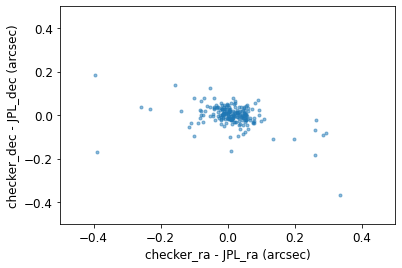

In [11]:
plt.xlim(-.5, .5)
plt.ylim(-.5, .5)
plt.scatter(seps_ra, seps_dec, marker='.', alpha=0.5)
plt.xlabel('checker_ra - JPL_ra (arcsec)')
plt.ylabel('checker_dec - JPL_dec (arcsec)')

In [12]:
units.angular_separation = u.deg
epoch = '2022-05-17'
ra = 0
dec = -2
radius = 1.1
rocks_in_field, obs = checker.check(ra, dec, radius, epoch, maglim=27, obscode='W84', units=units)

Output()

In [13]:
#If there is nothing in the field, checker will return None
#use iso timeformat
units.timeformat = 'iso' 
epoch = '2022-05-16.73'
ra = 0
dec = -30
radius = Angle(3, unit=u.arcmin)
rocks_in_field, obs = checker.check(ra, dec, radius, epoch, maglim=27, obscode='566', units=units)

/Users/edlin/opt/anaconda3/lib/python3.9/site-packages/spacerocks/mpchecker.py:61: UserWarning: No known object! Return None.
  warnings.warn('No known object! Return None.')


In [14]:
print(rocks_in_field, obs)

None None


In [15]:
#The maximum search radius is 7 degrees
epoch = '2022-05-16.73'
ra = 0
dec = -30
radius = Angle(50, unit=u.deg) #the radius execced 3 degrees, checker will use 3 degrees radius instead
rocks_in_field, obs = checker.check(ra, dec, radius, epoch, maglim=27, obscode='566', units=units)

/Users/edlin/opt/anaconda3/lib/python3.9/site-packages/spacerocks/mpchecker.py:39: UserWarning: Exceed maximum search radius, using radius = 7 degrees instead.
  warnings.warn('Exceed maximum search radius, using radius = 7 degrees instead.')


Output()

In [16]:
print(f'There are {len(rocks_in_field)} asteroids in the field.')

There are 457 asteroids in the field.
